## Data Exploration

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("bike_sharing_data.csv")

# Check the first few rows of the dataset
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


## Data Preprocessing

In [3]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract additional date-time features
df['hour'] = df['timestamp'].dt.hour.astype('int64')
df['day'] = df['timestamp'].dt.day.astype('int64')
df['month'] = df['timestamp'].dt.month.astype('int64')
df['year'] = df['timestamp'].dt.year.astype('int64')
df['weekday'] = df['timestamp'].dt.weekday.astype('int64')

# Drop original timestamp column if not needed
df.drop(columns=['timestamp'], inplace=True)

## Exploratory Data Analysis (EDA)

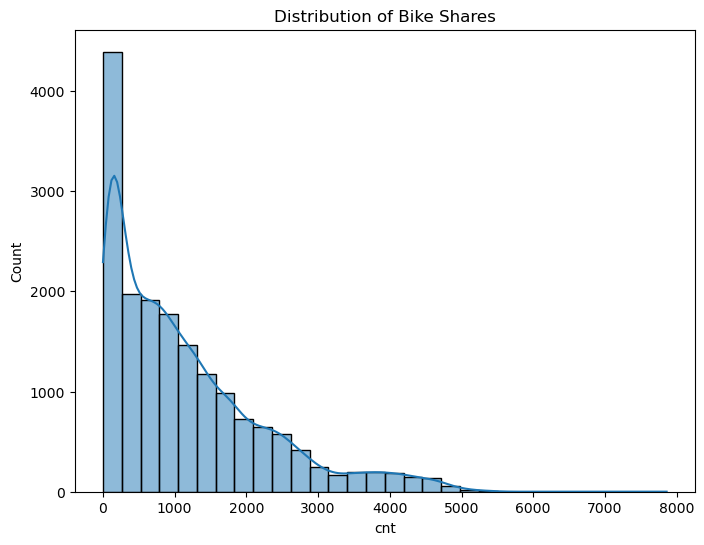

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the target variable 'cnt' (bike shares)
plt.figure(figsize=(8, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Shares")
plt.show()

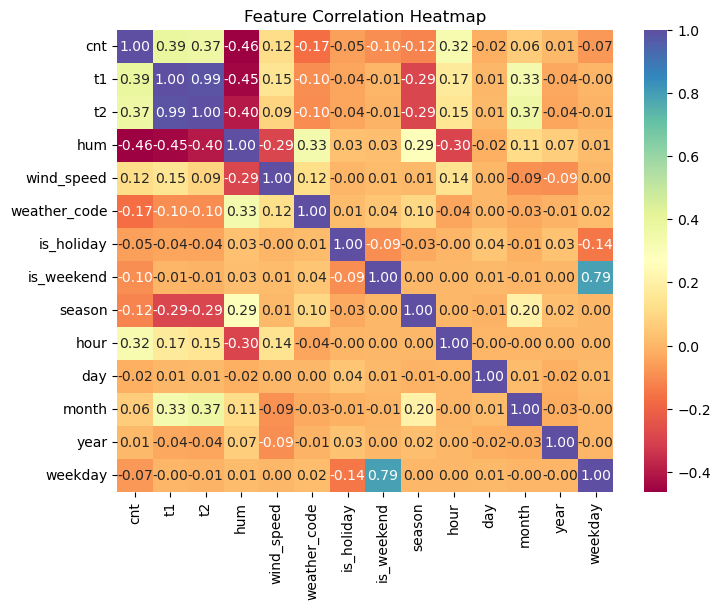

In [5]:
# Check correlations between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

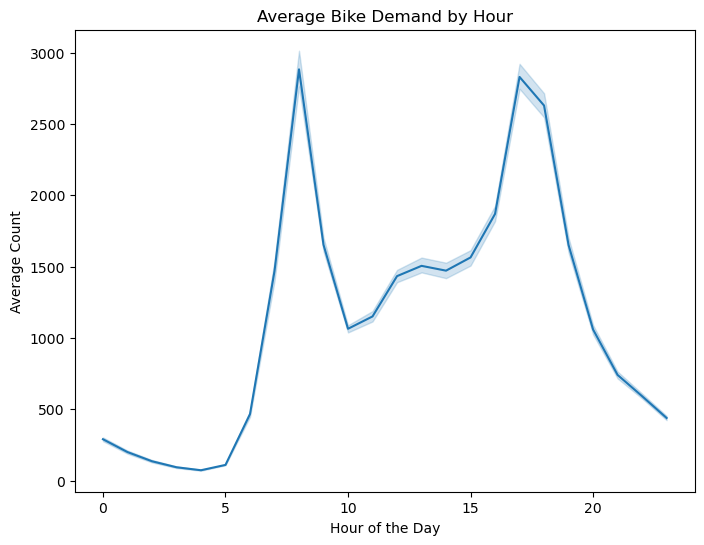

In [6]:
# Demand by hour
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['hour'], y=df['cnt'], estimator='mean')
plt.title("Average Bike Demand by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.show()

<Figure size 500x500 with 0 Axes>

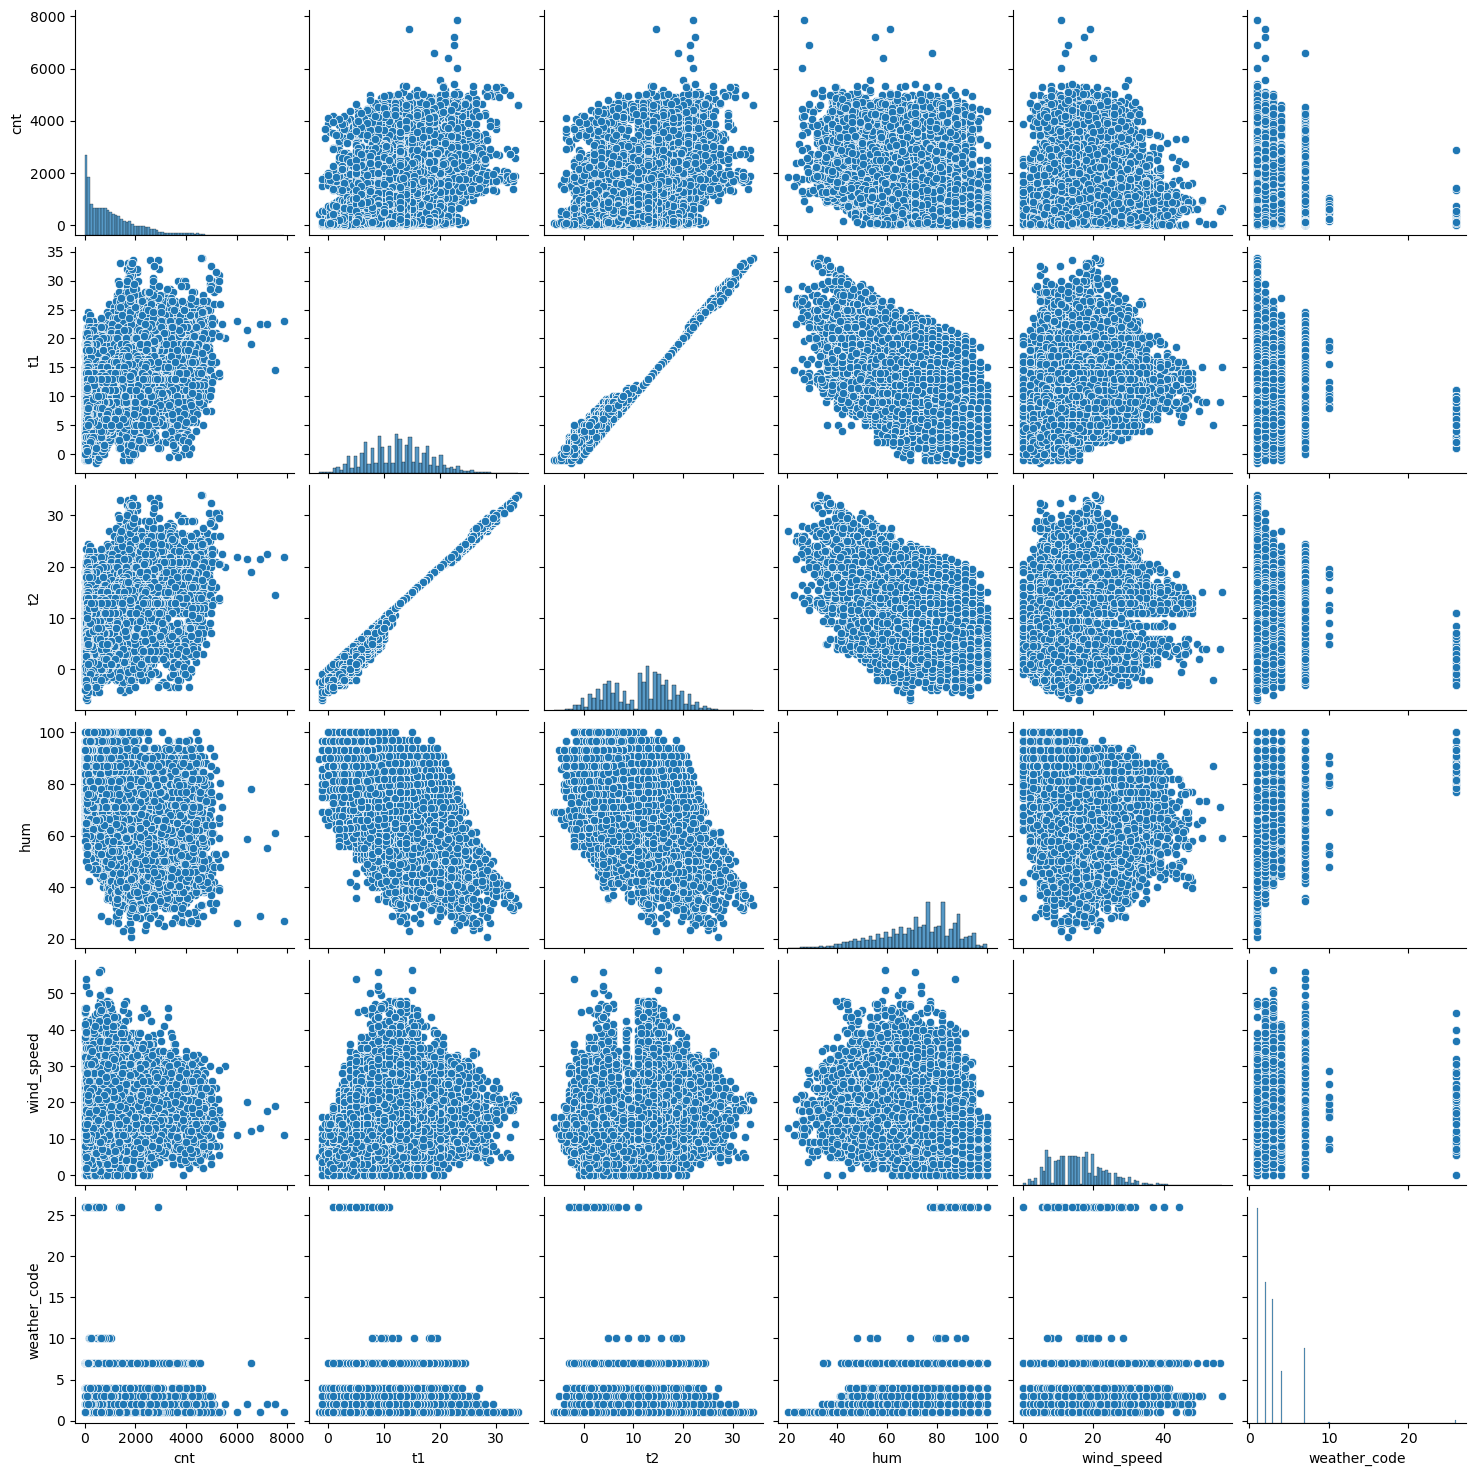

In [7]:
# Plot relationships with the target variable
plt.figure(figsize=(5, 5))
sns.pairplot(df[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code']])
plt.show()

## Prepare Data for Training

In [8]:
# Define features (X) and target (y)
X = df.drop(columns=['cnt'])  # Remove target variable
y = df['cnt']  # Target variable

In [9]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train & Evaluate a Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression:
Mean Absolute Error: 669.2430789517848
Mean Squared Error: 851079.8525821761
R² Score: 0.2897268153233188


## Model Visualization

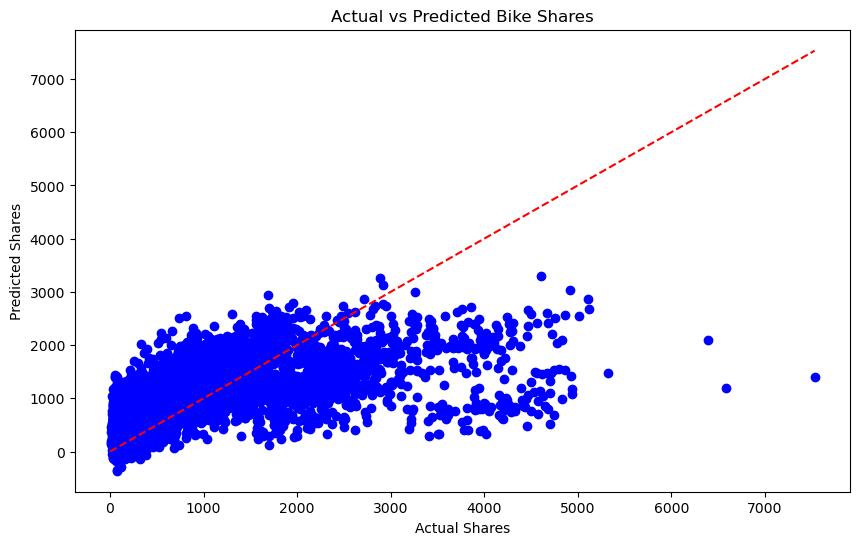

In [12]:
# Plot actual vs predicted bike shares
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Bike Shares")
plt.xlabel("Actual Shares")
plt.ylabel("Predicted Shares")
plt.show()

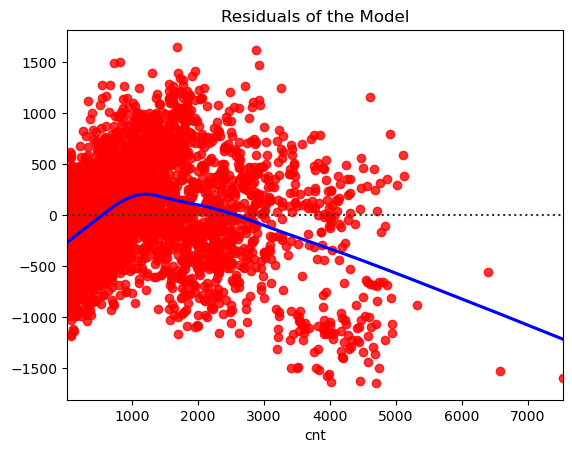

In [13]:
# Residual Plot to check errors
sns.residplot(x=y_test, y=y_pred, lowess=True, color='red', line_kws={'color': 'blue'})
plt.title("Residuals of the Model")
plt.show()

## Model Tuning

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest:
Mean Absolute Error: 114.99002583979329
Mean Squared Error: 45897.53269727247
R² Score: 0.9616959717483782
